In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


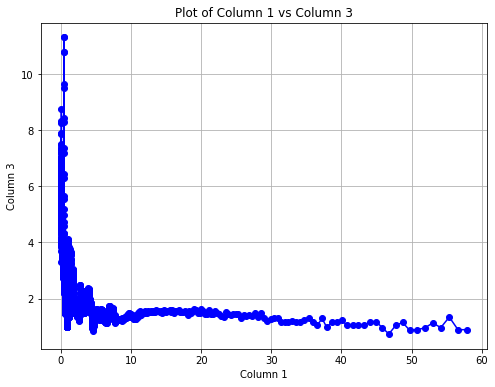

In [2]:
#Run this first
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import csv

# Read the data from a text file
# Replace 'your_data_file.txt' with the actual path to your file
df = pd.read_csv('data/Harvey_14N_n_TOT.dat', delimiter='\t', header=None)

#Fix the data. The Input data file is lab frame, while the Output data file is CoM frame
#E_cm = E_lab (M_light + M_heavy)/M_heavy; do this to convert lab to CoM, E_lab=df[]

#Neutron mass, projectile
M_light= 939.565 #MeV/c^2

#14N Mass, target
#In amu: 14.0030740, from: https://atom.kaeri.re.kr/cgi-bin/nuclide?nuc=N14
M_heavy= (14.0030740)*(931.49432)

# Extract the first and third columns
x_data = df[0]*M_heavy/(M_light+M_heavy)  # First column
y_data = df[2]  # Third column

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='b')
plt.xlabel('Column 1')
plt.ylabel('Column 3')
plt.title('Plot of Column 1 vs Column 3')
plt.grid(True)
plt.show()


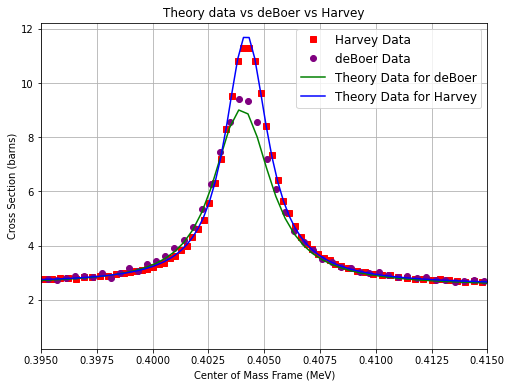

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import csv

#Notes for problems/unknowns
##AZURE Input is in lab frame (known, MeV), output is in CoM (known, MeV)
##Harvey's frame (unknown), units are keV (converted to MeV)

# Define the file paths
#file1 = 'ELBE-Data-Output/AZUREOut_aa=2_R=1.out' #Old ELBE
#file2 = 'ELBE-Data-Output/AZUREOut_aa=2_R=2.out' #Old ELBE
#file3 = 'ELBE-Data-Output/AZUREOut_aa=2_R=3.out' #Old ELBE
file1 = 'NewInput-Output/AZUREOut_aa=2_R=1.out' #New ELBE
file2 = 'NewInput-Output/AZUREOut_aa=2_R=2.out' #New ELBE
file3 = 'NewInput-Output/AZUREOut_aa=2_R=3.out' #New ELBE
#file4 = 'harveyneutenergy-430kev.csv' #All data
#file4 = '14N-Harvey-v-deBoer.csv' #deBoer data match
#file4 = 'ELBE_TXS_2022.dat'
file4 = 'data/ELBE_ntot.dat' #new ELBE?
file5 = 'Harvey-Data-Output/AZUREOut_aa=2_R=1.out'
file6 = 'Harvey-Data-Output/AZUREOut_aa=2_R=2.out'
file7 = 'Harvey-Data-Output/AZUREOut_aa=2_R=3.out'

# Load each file with pandas and extract the necessary columns
df1 = pd.read_csv(file1, sep='\s+', header=None) #deBoer
df2 = pd.read_csv(file2, sep='\s+', header=None) #deBoer
df3 = pd.read_csv(file3, sep='\s+', header=None) #deBoer
#df4 = pd.read_csv(file4, header=None,skiprows=1)
df4 = pd.read_csv(file4,  sep='\s+', header=None, skiprows=0) #for ELBE_TXS
df5 = pd.read_csv(file5, sep='\s+', header=None)
df6 = pd.read_csv(file6, sep='\s+', header=None)
df7 = pd.read_csv(file7, sep='\s+', header=None)

# Extract the first column from the first file and the fourth column from all three files
# This is for the deBoer files
xdeb_out = df1[0]  # First column from the first file
#y_sum = df1[3] + df2[3] + df3[3]  # Sum of the fourth columns from all three files
ydeb_sum = df2[3]

# Extract the first column from the first file and the fourth column from all three files
# This is for the Harvey files
xharv_out = df5[0]
yharv_sum = df6[3]

#Harvey data
#x_harv = df4[0]*M_heavy/(M_light+M_heavy)/10**3
#y_harv = df4[2]

#deBoer data, we think the "harvey data" above is mislabled. Harvey should be 14N, which is the cell above this
x_deb = (df4[0]*M_heavy/(M_light+M_heavy)/10**3)*1000 #Multiplied by 1000 to convert from MeV to keV
y_deb = df4[2]
#print('y_deb is', y_deb)

# Plot
plt.figure(figsize=(8, 6))
plt.xlim([0.395,0.415])
#plt.xlim([0, 2])

plt.plot(x_data, y_data, marker='s', linestyle='', label='Harvey Data', color='red') #Harvey data
plt.plot(x_deb, y_deb, marker='o', linestyle='', label='deBoer Data', color='purple') #deBoer data   color='green', mfc='none',
plt.plot(xdeb_out, ydeb_sum, linestyle='-', label='Theory Data for deBoer', color='g') #Theory deBoer
plt.plot(xharv_out, yharv_sum, linestyle='-', label='Theory Data for Harvey', color='b') #Theory Harvey
plt.xlabel('Center of Mass Frame (MeV)')
plt.ylabel('Cross Section (barns)')
plt.title('Theory data vs deBoer vs Harvey')
plt.legend(loc='upper right', fontsize='large')
plt.grid(True)
plt.show()


In [4]:
import os
print(os.path.exists("ELBE-Data-Output"))


True


In [5]:
#Fix the factor for above
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths
file1 = 'AZUREOut_aa=2_R=1.extrap'
file2 = 'AZUREOut_aa=2_R=2.extrap'
file3 = 'AZUREOut_aa=2_R=3.extrap'

# Load each file with pandas and extract the necessary columns
df1 = pd.read_csv(file1, delim_whitespace=True, header=None)
df2 = pd.read_csv(file2, delim_whitespace=True, header=None)
df3 = pd.read_csv(file3, delim_whitespace=True, header=None)

# Extract the first column from the first file and the fourth column from all three files
x = df1[0]  # First column from the first file
y_sum = df1[3] + df2[3] + df3[3]  # Sum of the fourth columns from all three files

# Plot
plt.figure(figsize=(8, 6))
plt.xlim([0.275,0.475])
plt.plot(x, y_sum, marker='o', linestyle='-', color='b')
plt.plot(x_data, y_data, marker='o', linestyle='-', color='green')
plt.xlabel('First Column (from file 1)')
plt.ylabel('Sum of Fourth Columns (from all files)')
plt.title('Plot of First Column vs Sum of Fourth Columns')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'AZUREOut_aa=2_R=1.extrap'